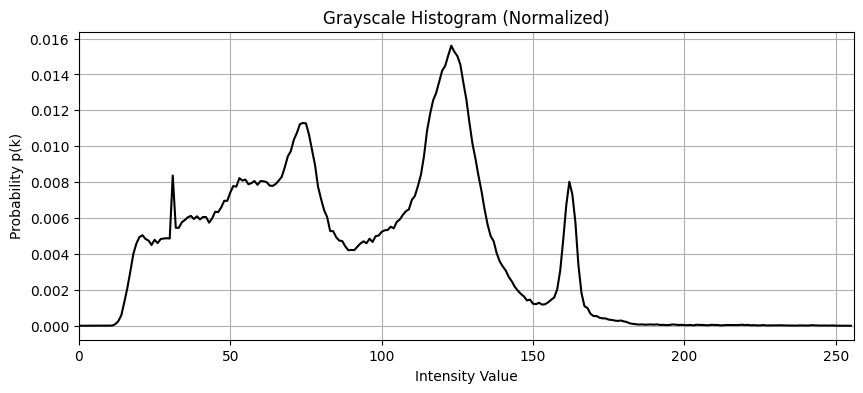

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('firstboard.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate histogram using OpenCV
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_norm = hist / hist.sum()  # Normalize: p(k) = n_k / n

# Plot histogram
plt.figure(figsize=(10, 4))
plt.plot(hist_norm, color='black')
plt.title('Grayscale Histogram (Normalized)')
plt.xlabel('Intensity Value')
plt.ylabel('Probability p(k)')
plt.xlim([0, 256])
plt.grid(True)
plt.show()


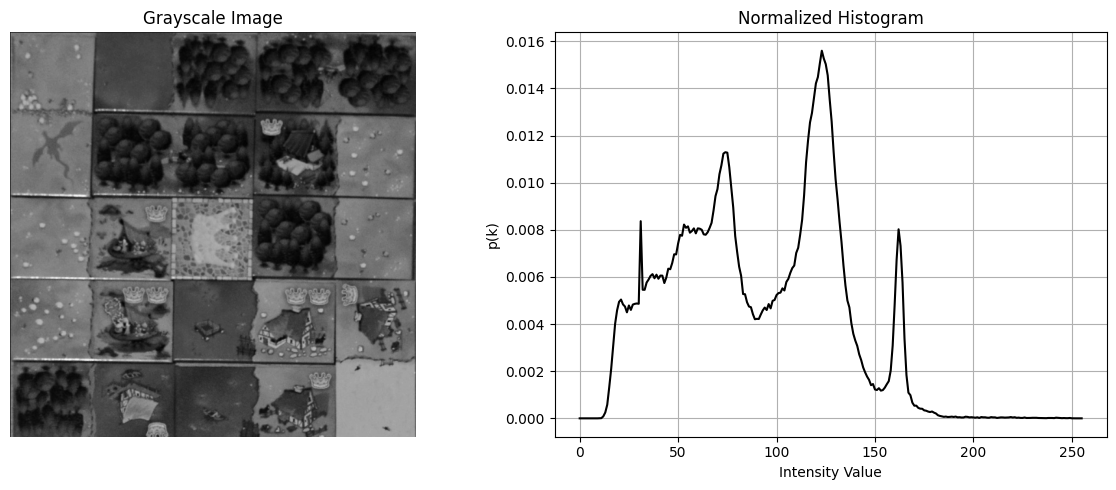

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("firstboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calculate histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_norm = hist / hist.sum()  # Normalize to probability

# Plot image and its histogram
plt.figure(figsize=(12, 5))

# Image
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Histogram
plt.subplot(1, 2, 2)
plt.plot(hist_norm, color='black')
plt.title('Normalized Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('p(k)')
plt.grid(True)

plt.tight_layout()
plt.show()


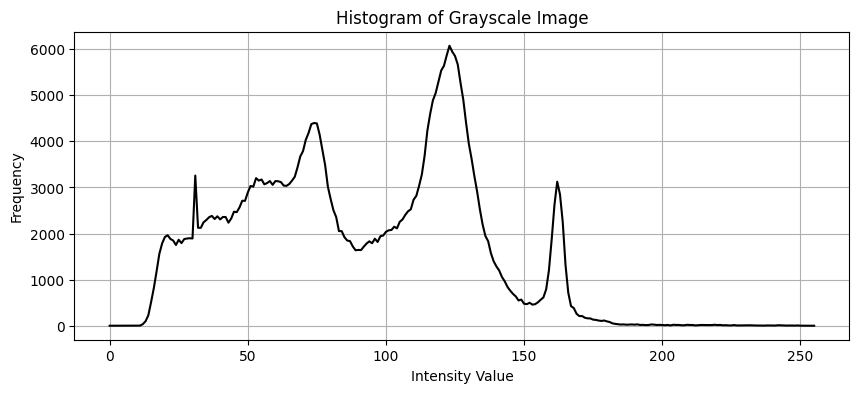

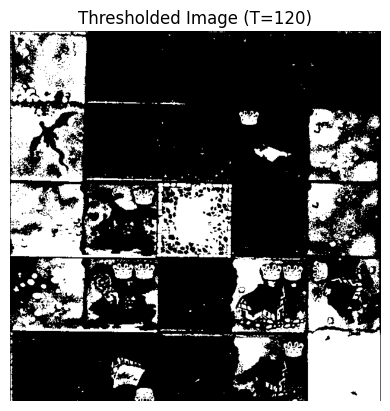

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and convert to grayscale
img = cv2.imread("firstboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Plot histogram to find peaks
plt.figure(figsize=(10, 4))
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Apply manual threshold
T = 120  # You can tweak this based on histogram shape
_, binary = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)

# Step 4: Show binary segmentation result
plt.imshow(binary, cmap='gray')
plt.title(f'Thresholded Image (T={T})')
plt.axis('off')
plt.show()


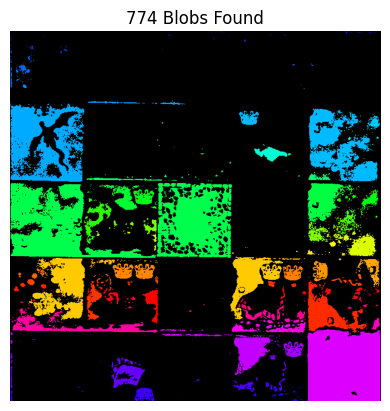

In [6]:
# 1. Binary image from thresholding
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# 2. Find connected components (blobs)
num_labels, labels_im = cv2.connectedComponents(binary)

# 3. Show each blob with a random color
label_hue = np.uint8(179 * labels_im / np.max(labels_im))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0  # background to black

# 4. Display
plt.imshow(labeled_img)
plt.title(f'{num_labels - 1} Blobs Found')
plt.axis('off')
plt.show()


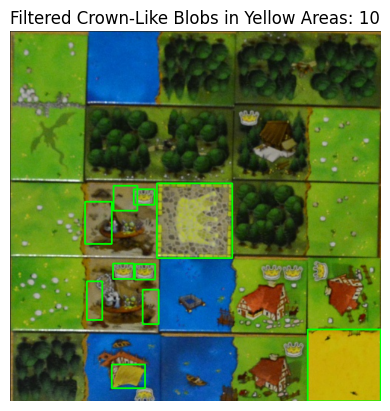

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("firstboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding to get binary image
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Step 1: Detect all contours (blobs)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 2: Create yellow mask from HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([35, 255, 255])
yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Step 3: Analyze blobs
result_img = img.copy()
min_blob_area = 300  # filter out small blobs
count = 0

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area >= min_blob_area:
        x, y, w, h = cv2.boundingRect(cnt)
        
        # Extract region of the yellow mask where the blob lies
        mask_crop = yellow_mask[y:y+h, x:x+w]
        
        # Check if there's yellow in the region
        yellow_ratio = cv2.countNonZero(mask_crop) / (w * h)
        if yellow_ratio > 0.3:  # at least 30% yellow in region
            cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            count += 1

# Show result
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title(f"Filtered Crown-Like Blobs in Yellow Areas: {count}")
plt.axis('off')
plt.show()


Blob 16: Area=632.00, Center=(226,611), Aspect=1.52, Circularity=0.66
Blob 23: Area=447.50, Center=(395,598), Aspect=1.32, Circularity=0.20
Blob 33: Area=1946.50, Center=(194,575), Aspect=1.09, Circularity=0.45
Blob 40: Area=745.00, Center=(477,535), Aspect=1.36, Circularity=0.57
Blob 47: Area=2889.00, Center=(406,537), Aspect=1.14, Circularity=0.27
Blob 49: Area=381.00, Center=(305,511), Aspect=17.00, Circularity=0.10
Blob 59: Area=399.00, Center=(392,501), Aspect=2.94, Circularity=0.29
Blob 68: Area=1361.00, Center=(471,494), Aspect=1.77, Circularity=0.19
Blob 91: Area=758.50, Center=(240,456), Aspect=0.47, Circularity=0.28
Blob 93: Area=311.00, Center=(456,461), Aspect=0.26, Circularity=0.14
Blob 99: Area=18992.50, Center=(556,542), Aspect=0.61, Circularity=0.28
Blob 107: Area=1135.50, Center=(142,448), Aspect=0.60, Circularity=0.11
Blob 114: Area=724.50, Center=(522,404), Aspect=0.73, Circularity=0.57
Blob 121: Area=1562.50, Center=(207,403), Aspect=2.09, Circularity=0.24
Blob 123:

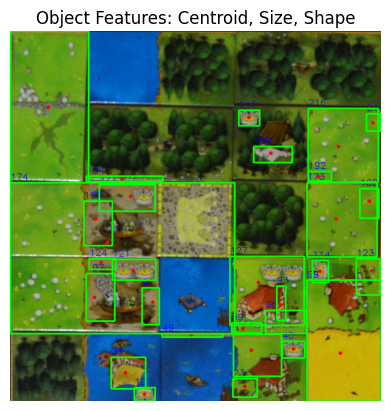

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare binary mask (can use threshold or mask here)
img = cv2.imread("firstboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Optional: Dilation to connect small gaps
kernel = np.ones((3, 3), np.uint8)
binary_dilated = cv2.dilate(binary, kernel, iterations=1)

# Find contours (connected blobs)
contours, _ = cv2.findContours(binary_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Analyze each blob
result = img.copy()
for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area < 300:  # Skip tiny noise blobs
        continue

    # Bounding box
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Center (centroid)
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(result, (cx, cy), 3, (0, 0, 255), -1)
        cv2.putText(result, f"{i+1}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Shape: optional features
    aspect_ratio = float(w) / h
    perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter != 0 else 0

    print(f"Blob {i+1}: Area={area:.2f}, Center=({cx},{cy}), Aspect={aspect_ratio:.2f}, Circularity={circularity:.2f}")

# Show result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Object Features: Centroid, Size, Shape")
plt.axis('off')
plt.show()


✅ Blob 1: Area=632.00, Center=(226,611), Aspect=1.52, Circularity=0.66
✅ Blob 2: Area=745.00, Center=(477,535), Aspect=1.36, Circularity=0.57
✅ Blob 3: Area=724.50, Center=(522,404), Aspect=0.73, Circularity=0.57
✅ Blob 4: Area=662.00, Center=(402,145), Aspect=1.35, Circularity=0.57


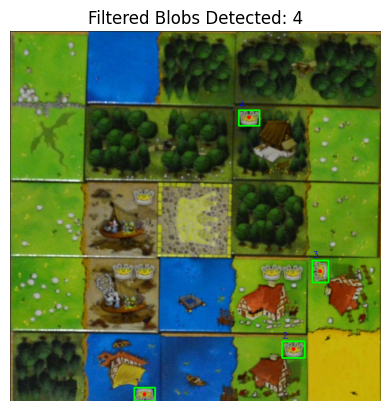

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare binary mask
img = cv2.imread("firstboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Optional: connect gaps
kernel = np.ones((3, 3), np.uint8)
binary_dilated = cv2.dilate(binary, kernel, iterations=1)

# Contours
contours, _ = cv2.findContours(binary_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filters
MIN_AREA = 500
MAX_AREA = 2500
MIN_ASPECT = 0.5
MAX_ASPECT = 2.0
MIN_CIRCULARITY = 0.50

# Result image
result = img.copy()
kept_count = 0

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area < MIN_AREA or area > MAX_AREA:
        continue

    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    if not (MIN_ASPECT <= aspect_ratio <= MAX_ASPECT):
        continue

    perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter != 0 else 0
    if circularity < MIN_CIRCULARITY:
        continue

    # Passed all filters
    kept_count += 1

    # Draw box and center
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(result, (cx, cy), 3, (0, 0, 255), -1)
        cv2.putText(result, f"{kept_count}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Print blob info
    print(f"✅ Blob {kept_count}: Area={area:.2f}, Center=({cx},{cy}), Aspect={aspect_ratio:.2f}, Circularity={circularity:.2f}")

# Show result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f"Filtered Blobs Detected: {kept_count}")
plt.axis('off')
plt.show()


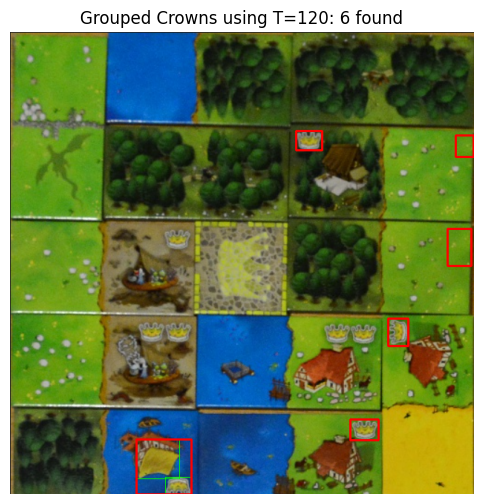

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Load and preprocess image
img = cv2.imread("firstboard.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ✅ Step 1: Apply manual threshold (your preferred method)
T = 120
_, binary = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)

# Optional: dilate to connect crown parts
kernel = np.ones((3, 3), np.uint8)
binary_dilated = cv2.dilate(binary, kernel, iterations=1)

# Find contours (potential blobs)
contours, _ = cv2.findContours(binary_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Blob filtering parameters
MIN_AREA = 300
MAX_AREA = 2500
MIN_ASPECT = 0.5
MAX_ASPECT = 2.0
MIN_CIRCULARITY = 0.25

blob_info_list = []
result = img.copy()

# ✅ Step 2: Filter and collect blob info
for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    if area < MIN_AREA or area > MAX_AREA:
        continue

    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = float(w) / h
    if not (MIN_ASPECT <= aspect_ratio <= MAX_ASPECT):
        continue

    perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter != 0 else 0
    if circularity < MIN_CIRCULARITY:
        continue

    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

        blob_info_list.append({
            'x': x, 'y': y, 'w': w, 'h': h,
            'center': (cx, cy)
        })

        # Optional debug: draw initial blob boxes
        cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 1)

# ✅ Step 3: Group similar blobs by center distance
def group_similar_blobs(blobs, distance_threshold=50):
    groups = []
    used = set()

    for i, blob1 in enumerate(blobs):
        if i in used:
            continue
        group = [blob1]
        used.add(i)

        for j, blob2 in enumerate(blobs):
            if j in used or i == j:
                continue
            d = distance.euclidean(blob1['center'], blob2['center'])
            if d < distance_threshold:
                group.append(blob2)
                used.add(j)

        # Merge group into bounding box
        xs = [b['x'] for b in group]
        ys = [b['y'] for b in group]
        ws = [b['x'] + b['w'] for b in group]
        hs = [b['y'] + b['h'] for b in group]
        x1, y1 = min(xs), min(ys)
        x2, y2 = max(ws), max(hs)
        groups.append((x1, y1, x2, y2))

    return groups

# ✅ Step 4: Apply grouping and draw red boxes
merged_boxes = group_similar_blobs(blob_info_list, distance_threshold=50)

for (x1, y1, x2, y2) in merged_boxes:
    cv2.rectangle(result, (x1, y1), (x2, y2), (0, 0, 255), 2)  # red = final crown box

# ✅ Step 5: Display result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f"Grouped Crowns using T={T}: {len(merged_boxes)} found")
plt.axis('off')
plt.show()
